# Regression

In regression, we want to predict a continuous value, such as the price of a property, the height of a person, the revenue of a game in the first month of release, etc.

Basically all the techniques studied so far, such as cross-validation, hyperparameter optimization and feature selection, also work for regression problems. 

The big difference between regression and classification is the type of data we want to predict and the metrics used to evaluate performance.

We will use the house price prediction dataset available on kaggle ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

In [55]:
# Import standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import matplotlib.pyplot as plt
import seaborn as sns

# odel selection libs
from sklearn.model_selection import train_test_split

# Feature engine libs
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.wrappers import SklearnTransformerWrapper

# Pipeline libs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Machine learning libs
from sklearn.linear_model import LinearRegression

# Machine Learning metrics
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-regression-reference/databases/house-price.csv', sep=";")
df.head()

,zoneamento,tam_terreno,forma_terreno,qualidade_geral,condicao,ano_construcao,qualidade_aquecedor,ar_condicionado,tam_primeiro_andar,tam_segundo_andar,...,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,qualidade_piscina,mes_venda,ano_venda,preco
0,RL,785.03035,Reg,7,5,2003,Ex,Y,79.524968,79.339162,...,30,8,0,2,50.910844,0.0,NotAv,2,2008,8.465100e+05
1,RL,891.86880,Reg,6,8,1976,Ex,Y,117.243586,0.000000,...,2,6,1,2,42.735380,0.0,NotAv,5,2007,7.344784e+05
2,RL,1045.15875,IR1,7,5,2001,Ex,Y,85.470760,80.453998,...,2,6,1,2,56.485024,0.0,NotAv,9,2008,9.074100e+05
3,RL,887.22365,IR1,7,5,1915,Gd,Y,89.279783,70.234668,...,1,7,1,3,59.643726,0.0,NotAv,2,2006,5.684000e+05
4,RL,1324.79678,IR1,8,5,2000,Ex,Y,106.373935,97.826859,...,2,9,1,3,77.666908,0.0,NotAv,12,2008,1.015000e+06


In [3]:
df.shape

(1458, 23)

In [4]:
df.columns

Index(['zoneamento', 'tam_terreno', 'forma_terreno', 'qualidade_geral',
       'condicao', 'ano_construcao', 'qualidade_aquecedor', 'ar_condicionado',
       'tam_primeiro_andar', 'tam_segundo_andar', 'tam_sala_estar',
       'qtde_quartos', 'qualidade_cozinha', 'qtde_banheiros', 'qtde_comodos',
       'qtde_lareiras', 'qtde_carros_garagem', 'tam_garagem', 'tam_piscina',
       'qualidade_piscina', 'mes_venda', 'ano_venda', 'preco'],
      dtype='object')

In [5]:
# Changing to en-us column names
df.rename(columns={
    'zoneamento': 'zoning',
    'tam_terreno': 'land_size',
    'forma_terreno': 'land_shape',
    'qualidade_geral': 'overall_quality',
    'condicao': 'condition',
    'ano_construcao': 'year_built',
    'qualidade_aquecedor': 'heater_quality',
    'ar_condicionado': 'air_conditioning',
    'tam_primeiro_andar': 'first_floor_size',
    'tam_segundo_andar': 'second_floor_size',
    'tam_sala_estar': 'living_room_size',
    'qtde_quartos': 'number_of_bedrooms',
    'qualidade_cozinha': 'kitchen_quality',
    'qtde_banheiros': 'number_of_bathrooms',
    'qtde_comodos': 'number_of_rooms',
    'qtde_lareiras': 'number_of_fireplaces',
    'qtde_carros_garagem': 'garage_capacity',
    'tam_garagem': 'garage_size',
    'tam_piscina': 'pool_size',
    'qualidade_piscina': 'pool_quality',
    'mes_venda': 'sale_month',
    'ano_venda': 'sale_year',
    'preco': 'price'
}, inplace=True)

# Display the renamed DataFrame
print(df.head())

  zoning   land_size land_shape  overall_quality  condition  year_built  \
0     RL   785.03035        Reg                7          5        2003   
1     RL   891.86880        Reg                6          8        1976   
2     RL  1045.15875        IR1                7          5        2001   
3     RL   887.22365        IR1                7          5        1915   
4     RL  1324.79678        IR1                8          5        2000   

  heater_quality air_conditioning  first_floor_size  second_floor_size  ...  \
0             Ex                Y         79.524968          79.339162  ...   
1             Ex                Y        117.243586           0.000000  ...   
2             Ex                Y         85.470760          80.453998  ...   
3             Gd                Y         89.279783          70.234668  ...   
4             Ex                Y        106.373935          97.826859  ...   

   number_of_bathrooms  number_of_rooms number_of_fireplaces  garage_capac

In [6]:
df.head()

,zoning,land_size,land_shape,overall_quality,condition,year_built,heater_quality,air_conditioning,first_floor_size,second_floor_size,...,number_of_bathrooms,number_of_rooms,number_of_fireplaces,garage_capacity,garage_size,pool_size,pool_quality,sale_month,sale_year,price
0,RL,785.03035,Reg,7,5,2003,Ex,Y,79.524968,79.339162,...,30,8,0,2,50.910844,0.0,NotAv,2,2008,8.465100e+05
1,RL,891.86880,Reg,6,8,1976,Ex,Y,117.243586,0.000000,...,2,6,1,2,42.735380,0.0,NotAv,5,2007,7.344784e+05
2,RL,1045.15875,IR1,7,5,2001,Ex,Y,85.470760,80.453998,...,2,6,1,2,56.485024,0.0,NotAv,9,2008,9.074100e+05
3,RL,887.22365,IR1,7,5,1915,Gd,Y,89.279783,70.234668,...,1,7,1,3,59.643726,0.0,NotAv,2,2006,5.684000e+05
4,RL,1324.79678,IR1,8,5,2000,Ex,Y,106.373935,97.826859,...,2,9,1,3,77.666908,0.0,NotAv,12,2008,1.015000e+06


In [7]:
df.dtypes

zoning                   object
land_size               float64
land_shape               object
overall_quality           int64
condition                 int64
year_built                int64
heater_quality           object
air_conditioning         object
first_floor_size        float64
second_floor_size       float64
living_room_size        float64
number_of_bedrooms        int64
kitchen_quality          object
number_of_bathrooms       int64
number_of_rooms           int64
number_of_fireplaces      int64
garage_capacity           int64
garage_size             float64
pool_size               float64
pool_quality             object
sale_month                int64
sale_year                 int64
price                   float64
dtype: object

In [8]:
# selecting target column
target = 'price'

# building a list with the names of only categorical variables
# select_dtypes (include='object') list of variables of type object
cat_vars = df.select_dtypes(include='object').columns.to_list()

# list only the names of numeric variables
# using list comprehension
num_vars = [col for col in df.columns if col not in cat_vars + ['Id', target]]

'''
# using for inside for
# produces the same response as the previous code
num_vars = []
for col in df.columns:
  if col not in cat_vars + ['Id', target]:
    num_vars.append(col)
'''

# separating the base into training and testing
# at this point we will only use numeric variables
X = df.filter(num_vars).copy()
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [9]:
y_train.head()

482    537950.0
403    609000.0
161    418992.0
109    730800.0
814    556220.0
Name: price, dtype: float64

In [10]:
X_train.head()

,land_size,overall_quality,condition,year_built,first_floor_size,second_floor_size,living_room_size,number_of_bedrooms,number_of_bathrooms,number_of_rooms,number_of_fireplaces,garage_capacity,garage_size,pool_size,sale_month,sale_year
482,720.741474,5,7,1962,92.810097,0.000000,92.810097,3,1,6,0,1,24.526392,0.0,3,2007
403,928.193873,4,4,1976,150.502860,0.000000,150.502860,3,2,8,1,2,45.522470,0.0,6,2009
161,510.966500,4,6,1956,81.940446,0.000000,81.940446,1,1,4,0,0,0.000000,0.0,4,2007
109,719.998250,7,5,2000,71.906922,60.944368,132.851290,3,2,7,1,2,37.161200,0.0,4,2010
814,1061.416775,5,6,1954,93.646224,0.000000,93.646224,2,1,4,1,1,25.548325,0.0,7,2006


## Applying Multiple Linear Regression

In [11]:
# installing the feature-engine package
!pip install feature-engine

In [12]:
model = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('lr', LinearRegression())
])

In [13]:
# .fit will generate the machine learning model, calculate the recipe on the training basis
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_expected = y_test.copy()

In [14]:
y_expected[:3], y_predict[:3]

(1456    577027.5
 791     913500.0
 1082    761250.0
 Name: price, dtype: float64,
 array([479345.9573164 , 957375.94167732, 714520.17602057]))

In [15]:
# b0
model[-1].intercept_

738130.4797160049

In [16]:
# b1, b2, b3, ..., bn
model[-1].coef_

array([ 27491.88367964, 109000.97062947,  28377.13358318,  65975.29887645,
        58509.00658543,  24615.05743636,  84915.49045799, -29609.20357919,
       -13180.23736347,  19950.79683075,  13769.5380539 ,  22268.12321766,
        15731.15689468, -19071.02351735,  -1515.09217393,  -1849.52421253])

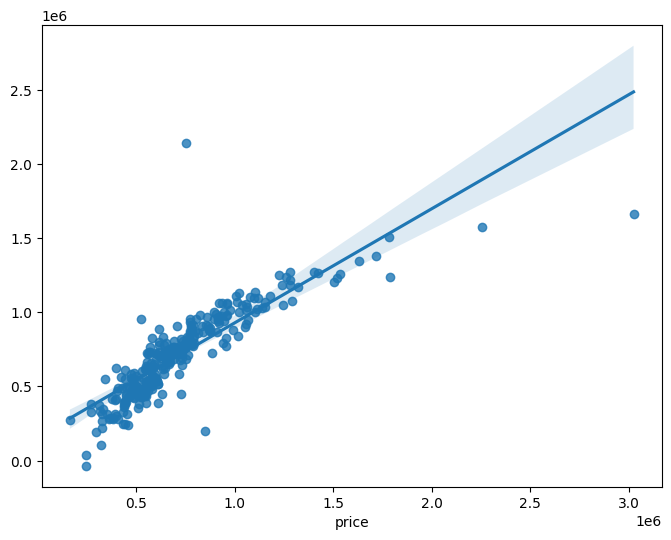

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x=y_expected, y=y_predict, ax=ax);

## Computing the Metrics
- R2 and R2 Adjusted
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- RMSLE (Root Mean Squared Logarithmic Error)
- Max Error
- MedAE (Median Absolute Percentage Error)
- MAPE (Mean Absolute Percentage Error)






As we've seen, some of these metrics are affected by outliers, so let's test with and without outliers.

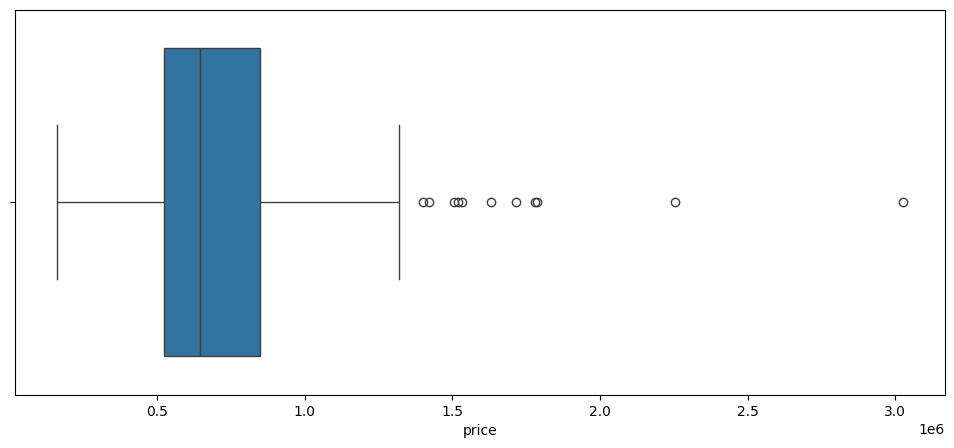

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x=y_expected);

In [19]:
# ensuring that both variables without outliers have the same dimension
# Let's remove values greater than 340000
y_expected_without_outlier = y_expected[y_expected < 1500000]
y_predict_without_outlier = y_predict[y_expected < 1500000]

In [20]:
y_expected_without_outlier.shape

(283,)

In [22]:
y_predict_without_outlier

array([ 479345.9573164 ,  957375.94167732,  714520.17602057,
        976408.73238267,  619187.71805646, 1098881.83377224,
        548687.34069907,  -34809.79063088,  612979.81045686,
       1058423.67473433,  329701.58773356,  539278.90134285,
        745069.85835885,  541476.87793588, 1069954.87969626,
        487055.99877107,  699244.21183221,  715744.97944197,
        217823.0679412 ,  398662.87329824,  875194.99434479,
        580648.41335261,  439811.49513459,  902662.08646666,
        649882.35367414,  429929.97998509,  758386.47673459,
        768371.00887331, 1099971.46999781,  514401.16014605,
        287099.35224207,  981595.64430061,  497674.58892089,
        560172.97180579,  240574.06451035,  737069.25007284,
        626154.56307646,  755914.49180246,  495280.25192462,
        909003.05291452,  666560.76998176,  687497.31648854,
        446123.67075831,  969794.86260974,  385826.86609346,
        442708.07045475,  938159.67944978,  538148.49163643,
        916037.54762942,

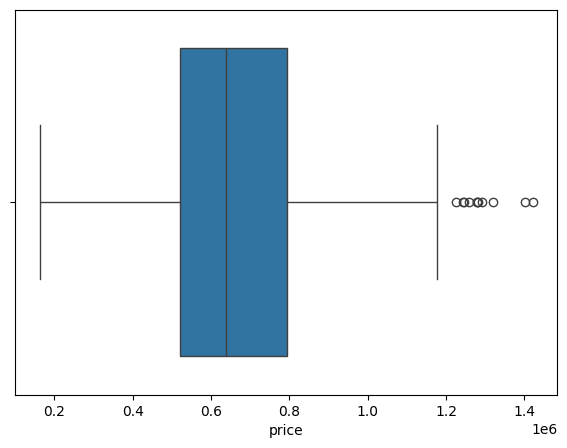

In [23]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_expected_without_outlier);

### R2 e R2 Ajustado

In [24]:
r2 = r2_score(y_expected, y_predict)
r2_without_outliers = r2_score(y_expected_without_outlier, y_predict_without_outlier)

print('R2 WITH outliers:', r2)
print('R2 WITHOUT outliers:', r2_without_outliers)

R2 WITH outliers: 0.7249727105572581
R2 WITHOUT outliers: 0.6796740676845554


In [31]:
# Function to calculate the adjusted R²
def calculate_adjusted_r2(y_expected, y_predict, X_train):
    from sklearn.metrics import r2_score
    n = len(y_expected)  # number of observations
    p = X_train.shape[1]  # number of independent variables
    r2 = r2_score(y_expected, y_predict)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [32]:
# Calling the function correctly
adjusted_r2_value = calculate_adjusted_r2(y_expected, y_predict, X_train)
adjusted_r2_without_outliers_value = calculate_adjusted_r2(y_expected_without_outlier, y_predict_without_outlier, X_train)

print('Adjusted R² WITH outliers:', adjusted_r2_value)
print('Adjusted R² WITHOUT outliers:', adjusted_r2_without_outliers_value)

Adjusted R² WITH outliers: 0.7089711228078621
Adjusted R² WITHOUT outliers: 0.6604063424324986


### MAE

*Mean Absolute Error*

*Mean Absolute Error*

- Suffers fewer effects from outliers
- Uses the absolute value in contrast to `mse`, so it suffers less from the effects of outliers

In [35]:
mae = mean_absolute_error(y_expected, y_predict)
mae_without_outlier = mean_absolute_error(y_expected_without_outlier, y_predict_without_outlier)
print('MAE WITH outliers:', mae)
print('MAE WITHOUT outliers:', mae_without_outlier)

MAE WITH outliers: 97114.80039739984
MAE WITHOUT outliers: 84815.30809339904


In [36]:
# calculando a media do preco da casa
y_expected.mean(), y_expected.median()

(718626.9798630137, 645539.9999999999)

### MSE

The idea is to calculate the difference between the predicted value and the expected value.

In [38]:
mse = mean_squared_error(y_expected, y_predict)
mse_without_outliers = mean_squared_error(y_expected_without_outlier, y_predict_without_outlier)

print('MSE WITH outliers:', mse)
print('MSE WITHOUT outliers:', mse_without_outliers)

MSE WITH outliers: 28371132646.157375
MSE WITHOUT outliers: 18169086786.152065


###RMSE

*Root Mean Squared Error*

*Square Root of Mean Error*

- Same unit as the original measurement (that's why we took the square root)
- Larger errors are more penalized (greatly affected by outliers)

In [41]:
rmse = mean_squared_error(y_expected, y_predict, squared=False)
rmse_withou_outliers = mean_squared_error(y_expected_without_outlier, y_predict_without_outlier, squared=False)

print('RMSE WITH outliers:', rmse)
print('RMSE WITHOUT outliers:', rmse_withou_outliers)

RMSE WITH outliers: 168437.3255729186
RMSE WITHOUT outliers: 134792.7549468148


Taking out the outliers, `rmse` improves a lot. It can often happen that we break the regression problem into 2: creating a model for the normal points and another model for outliers.

RMSE COM outliers: 168437.3255729186
RMSE SEM outliers: 134792.7549468148


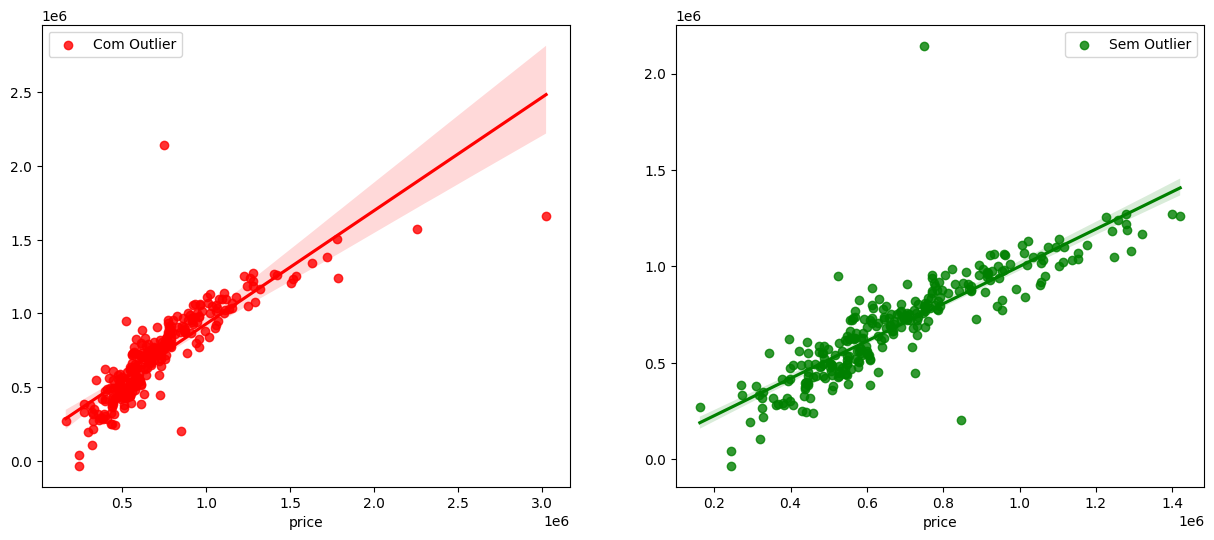

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.regplot(x=y_expected, y=y_predict, label='Com Outlier', ax=ax[0], color='red');
sns.regplot(x=y_expected_without_outlier, y=y_predict_without_outlier, label='Sem Outlier', ax=ax[1], color='green');
ax[0].legend();
ax[1].legend();

print('RMSE COM outliers:', rmse)
print('RMSE SEM outliers:', rmse_withou_outliers)

### RMSLE

*Root Mean Squared Logarithmic Error*

*Square Root of Mean Logarithmic Error*

- Approximation of percentage error
- `RMSE` cares more about the simple difference, while `RMSLE` cares about the relative difference (logs).
- It is more robust to outliers

In [44]:
print('RMSE 1:', mean_squared_error([1000], [600], squared=False))
print('RMSLE 1:', mean_squared_log_error([1000], [600], squared=False))

RMSE 1: 400.0
RMSLE 1: 0.5101598447800129


In [45]:
print('RMSE 2:', mean_squared_error([1000], [1400], squared=False))
print('RMSLE 2:', mean_squared_log_error([1000], [1401], squared=False))

RMSE 2: 400.0
RMSLE 2: 0.33690028827931506


In [47]:
# Ensure no negative values
y_expected = np.clip(y_expected, 0, None)
y_predict = np.clip(y_predict, 0, None)

y_expected_without_outlier = np.clip(y_expected_without_outlier, 0, None)
y_predict_without_outlier = np.clip(y_predict_without_outlier, 0, None)

# Calculate RMSLE
rmsle = mean_squared_log_error(y_expected, y_predict, squared=False)
rmsle_without_outlier = mean_squared_log_error(y_expected_without_outlier, y_predict_without_outlier, squared=False)

print('RMSLE WITH outliers:', rmsle)
print('RMSLE WITHOUT outliers:', rmsle_without_outlier)

RMSLE WITH outliers: 0.7639732196200514
RMSLE WITHOUT outliers: 0.7740452613797923


### Max Error

- The Max Error metric is the worst case error between the expected value and the predicted value.
- The best value for this metric is 0.

In [52]:
maximum_error = max_error(y_expected, y_predict)
maximum_error_without_outliers = max_error(y_expected_without_outlier, y_predict_without_outlier)

print('Max Error WITH outliers:', maximum_error)
print('Max Error WITHOUT outliers:', maximum_error_without_outliers)

Max Error WITH outliers: 1394144.2794137425
Max Error WITHOUT outliers: 1394144.2794137425


### MedAE - Median Absolute Error

*Median Absolute Error*

*Absolute Median Error*

In [54]:
medae = median_absolute_error(y_expected, y_predict)
medae_without_outlier = median_absolute_error(y_expected_without_outlier, y_predict_without_outlier)

print('MedAE WITH outliers:', medae)
print('MedAE WITHOUT outliers:', medae_without_outlier)

MedAE COM outliers: 67783.82253590925
MedAE SEM outliers: 65547.3406990692


Half of the absolute errors are below 13267 for the data with outliers and 12155 for the data without outliers.

### MAPE

*Mean Absolute Percent Error*

*Mean Absolute Percentage Error*

In [56]:
mape = mean_absolute_percentage_error(y_expected, y_predict)
mape_without_outlier = mean_absolute_percentage_error(y_expected_without_outlier, y_predict_without_outlier)


print('MAPE WITH Outlier:', mape)
print('MAPE WITHOUT Outlier:', mape_without_outlier)

MAPE WITH Outlier: 0.14589859041390243
MAPE WITHOUT Outlier: 0.14292358821622086
